In [1]:
# ! pip install -q kaggle

In [2]:
# from google.colab import files

# # files.upload()

# !rm -r ~/.kaggle
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle competitions download -c playground-series-s3e11
# !mkdir kaggle_data
# !unzip {competition_name + ".zip"} -d kaggle_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Dataset Statistics

In [3]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
train.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

In [5]:
# find the features with categorical variables
categorical_cols = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
print(f"Categorical Columns in Dataset: {categorical_cols}")

# # convert their data type to int64
for i in categorical_cols:
    train[i] = train[i].astype('int64')

for i in categorical_cols:
    test[i] = test[i].astype('int64')

Categorical Columns in Dataset: ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']


In [6]:
def summarise_data(df):
    dataset = pd.DataFrame(df.dtypes, columns=['dtypes'])
    dataset['null'] = df.isnull().sum()
    dataset['unique'] = df.nunique()
    dataset['min'] = df.min()
    dataset['median'] = df.median()
    dataset['max'] = df.max()
    dataset['mean'] = df.mean()
    dataset['std'] = df.std()
    return dataset


summarise_data(train)

,dtypes,null,unique,min,median,max,mean,std
id,int64,0,360336,0.00,180167.50,360335.00,180167.500000,104020.187637
store_sales(in millions),float64,0,1044,0.51,5.78,22.92,6.337376,3.307980
unit_sales(in millions),float64,0,6,1.00,3.00,6.00,3.043881,0.784676
total_children,float64,0,6,0.00,2.00,5.00,2.456482,1.488992
num_children_at_home,float64,0,6,0.00,0.00,5.00,0.689390,1.214732
avg_cars_at home(approx).1,float64,0,5,0.00,2.00,4.00,2.203813,1.084293
gross_weight,float64,0,384,6.00,13.60,21.90,13.822071,4.614792
recyclable_package,int64,0,2,0.00,1.00,1.00,0.568086,0.495343
low_fat,int64,0,2,0.00,0.00,1.00,0.327797,0.469411
units_per_case,float64,0,36,1.00,20.00,36.00,18.972706,10.212912


## Univariate Analysis

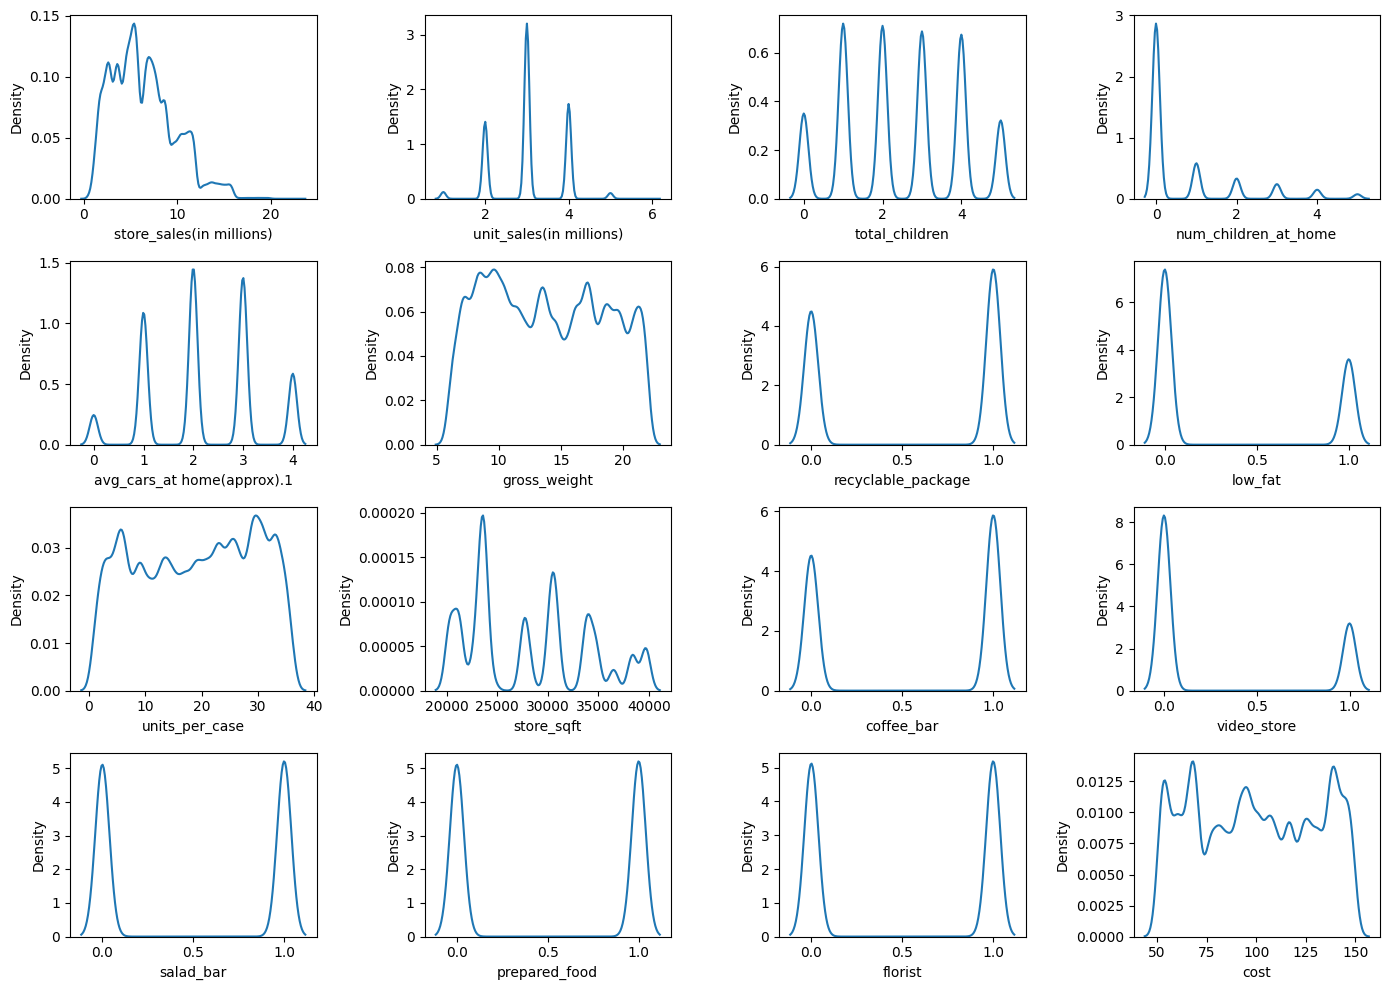

In [7]:
plt.figure(figsize=(14,10))
for i in range(1, len(train.columns)):
    plt.subplot(4,4,i)
    sns.kdeplot(x=train[train.columns[i]], label='Full Dataset')
    plt.tight_layout()

## Categorical Columns

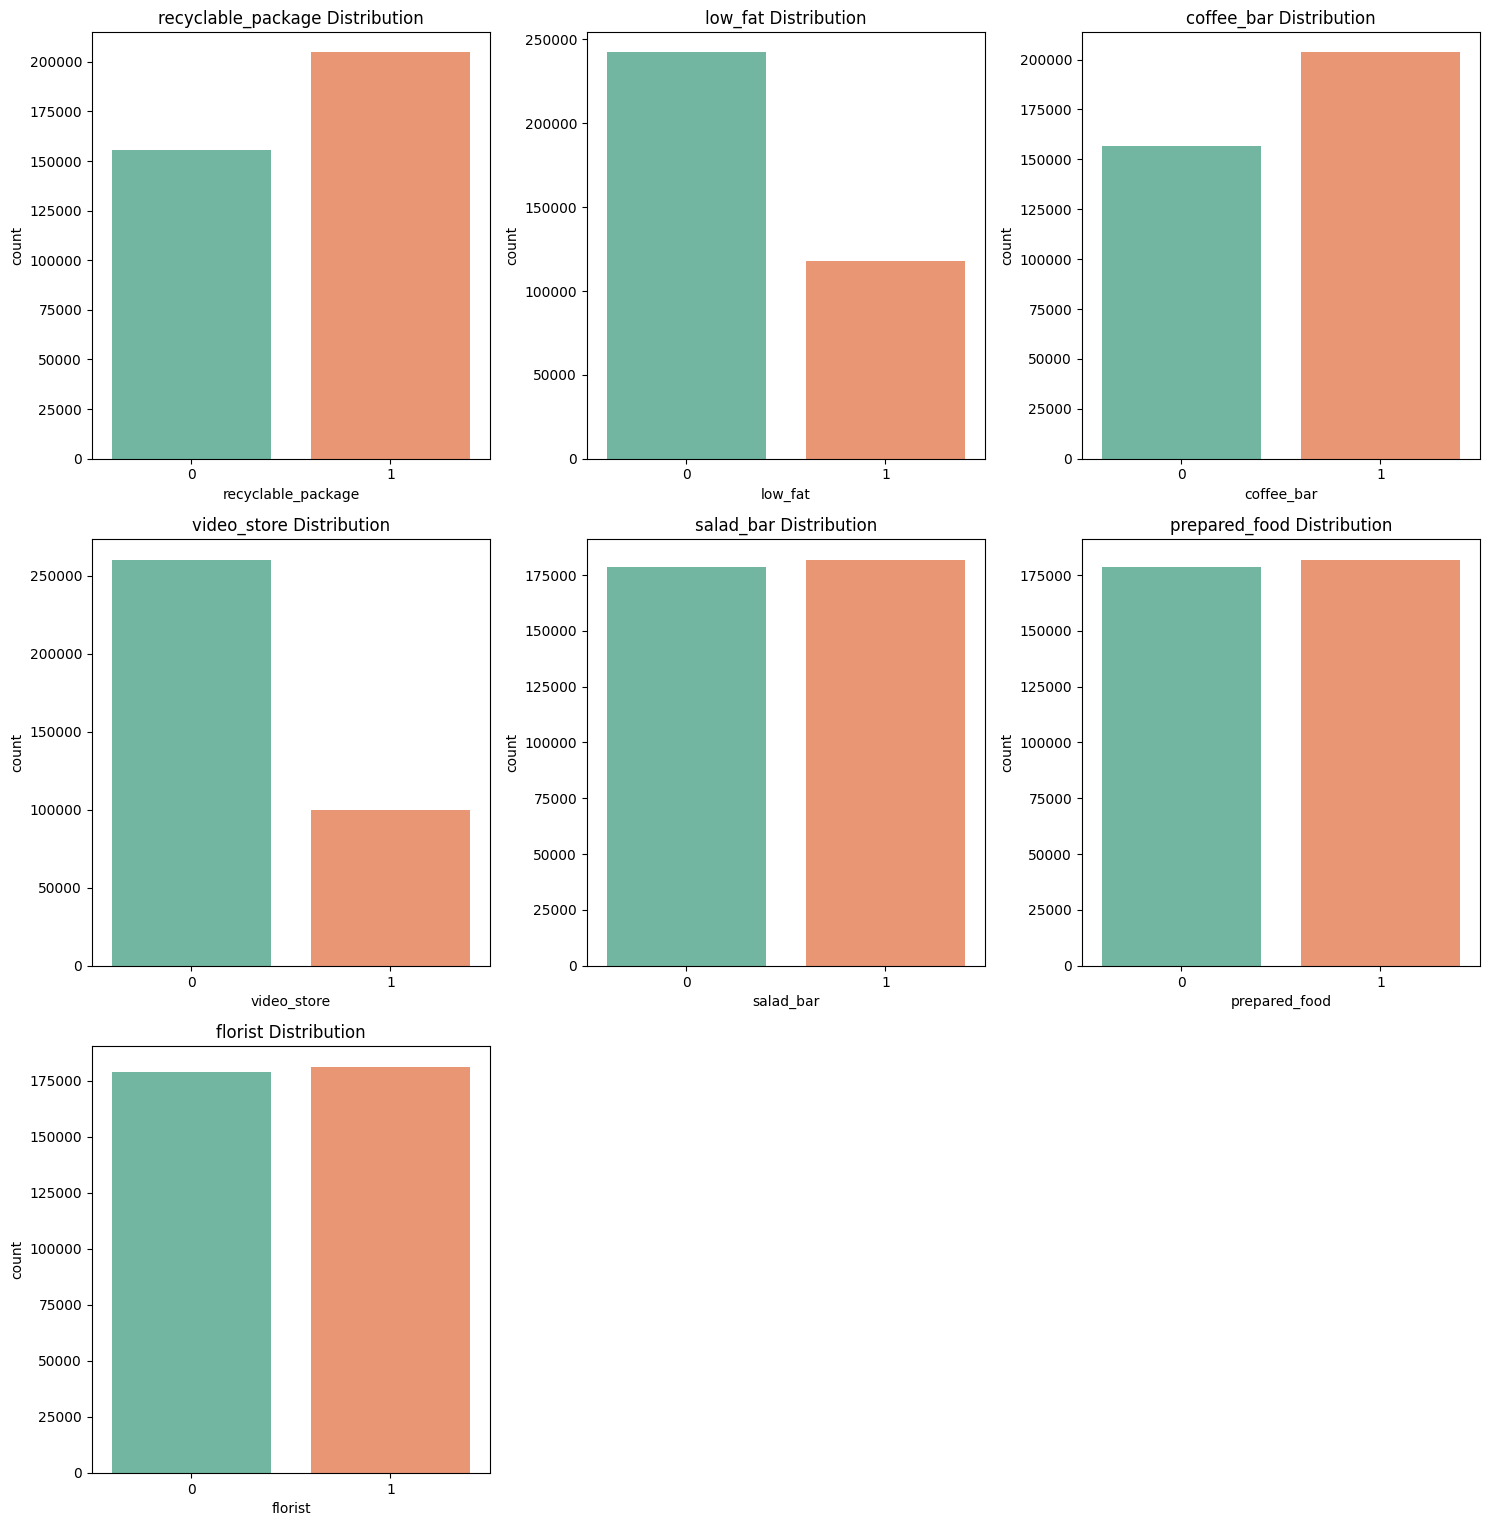

In [8]:
# plot distribution of categorical columns
plt.figure(figsize=(15,20))
for id,column in enumerate(categorical_cols):
    plt.subplot(4,3,id+1)
    sns.countplot(x=column, data=train, palette="Set2", hue=column, legend=False)
    plt.title(f"{column} Distribution")

    plt.tight_layout()

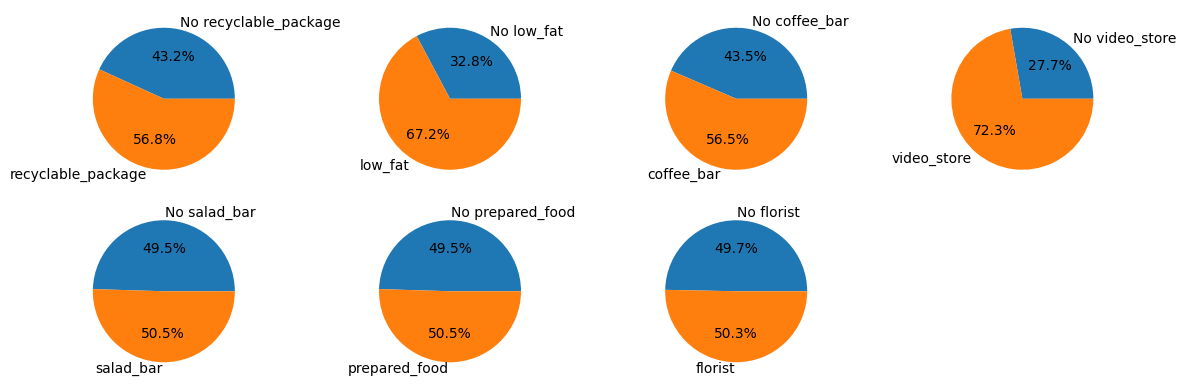

In [9]:
# Generate a pie chart to visualize the distribution of binary value categorical columns

plt.figure(figsize=(12,4))
categorial_bin = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']

for i in range(0, len(categorial_bin)):
    plt.subplot(2,4,i+1)
    data=train[categorial_bin[i]].value_counts().sort_values()
    labels = [f'No {categorial_bin[i]}', f'{categorial_bin[i]}']
    plt.pie(data,labels=labels,autopct='%.1f%%')
    plt.tight_layout()

## Correlation Heatmap

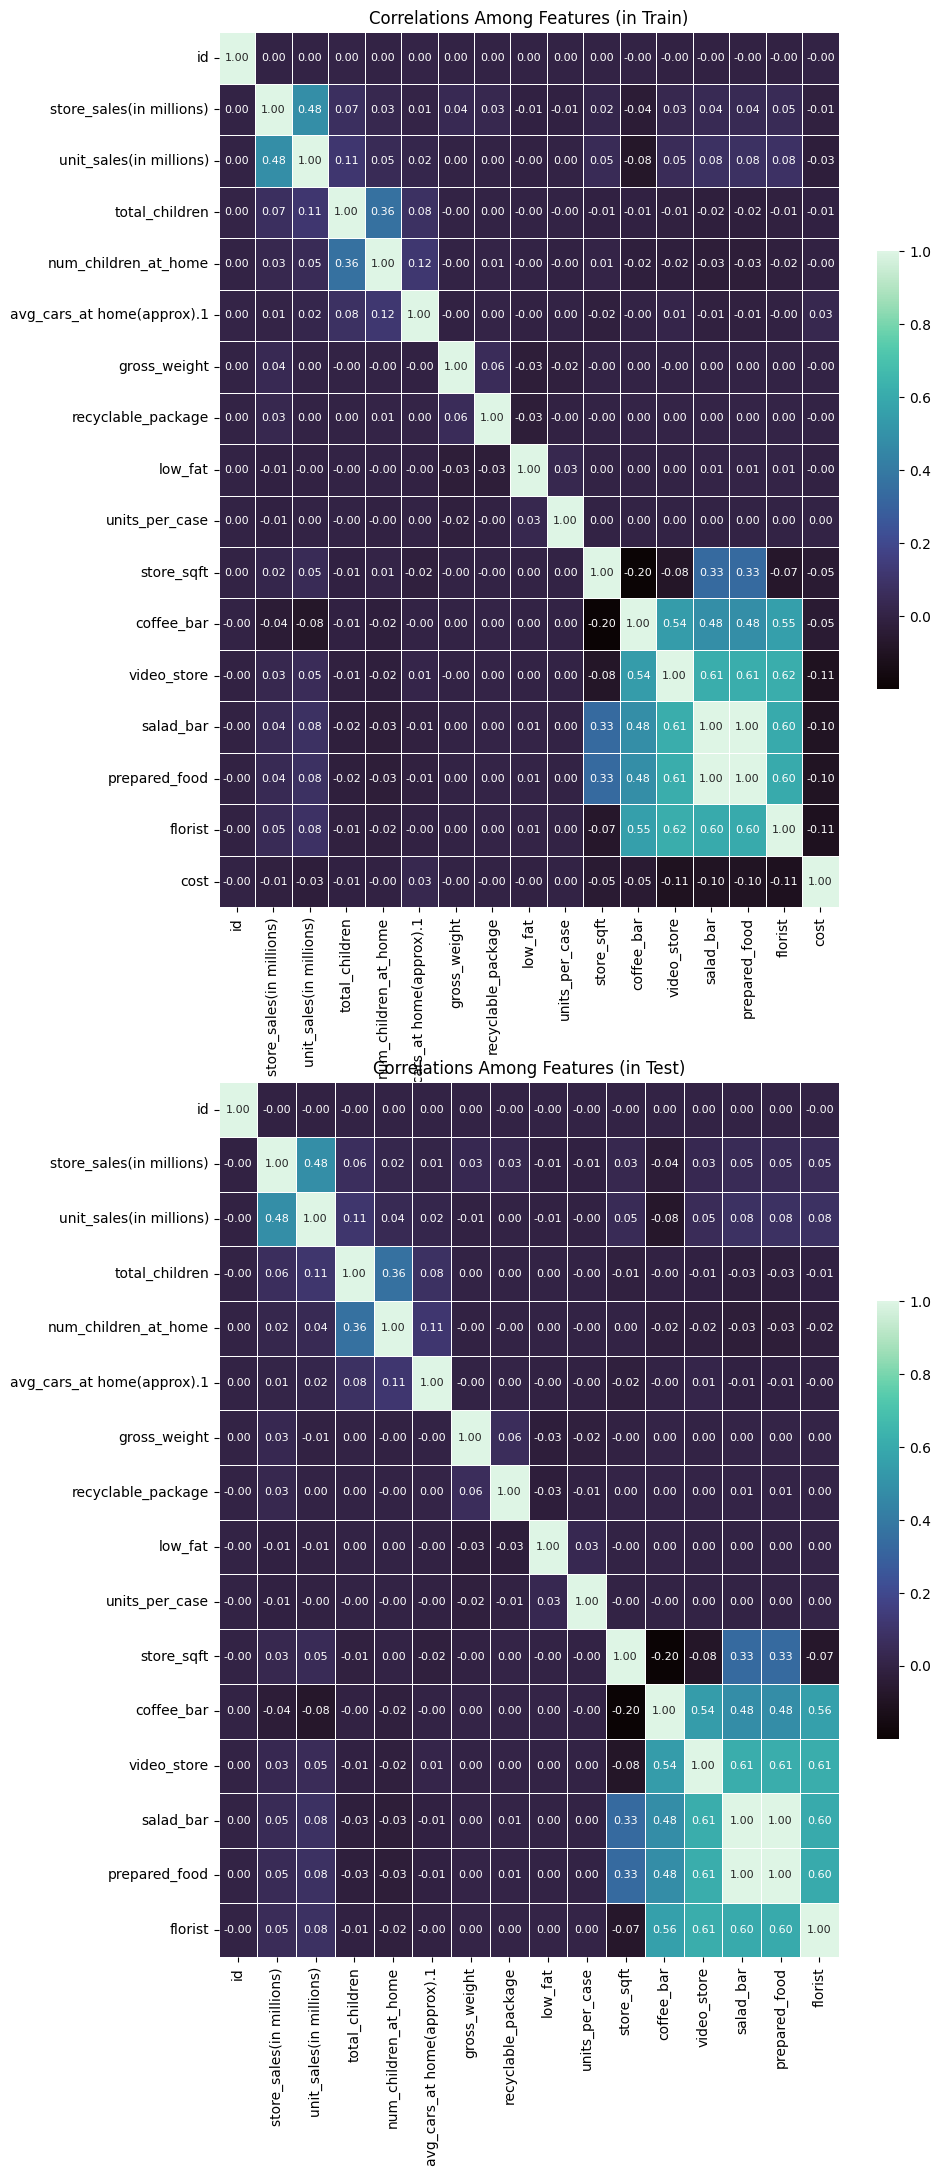

In [10]:
corr_mat_train = train.corr()
corr_mat_test = test.corr()

fig, axes = plt.subplots(2, 1, figsize = (10, 25))
sns.heatmap(corr_mat_train, annot = True, cmap = 'mako', fmt = ".2f",
            linewidths = 0.5, cbar_kws={'shrink': .5},annot_kws={'size': 8}, ax = axes[0]).set_title('Correlations Among Features (in Train)')
sns.heatmap(corr_mat_test, annot = True, cmap = 'mako', fmt = ".2f",
            linewidths = 0.5, cbar_kws={'shrink': .5},annot_kws={'size': 8}, ax = axes[1]).set_title('Correlations Among Features (in Test)');

Salad bar and prepared food is perfectly correlated, we drop one of them.

In [11]:
train = train.drop('salad_bar', axis=1)

In [12]:
# !pip install scikit-learn==1.4

In [13]:
from sklearn.preprocessing import StandardScaler

FEATURES = [
    'store_sales(in millions)',
    'unit_sales(in millions)',
    'total_children',
    'num_children_at_home',
    'avg_cars_at home(approx).1',
    'low_fat',
    'store_sqft',
    'coffee_bar',
    'video_store',
    'prepared_food',
    'florist'
]

train_averages = pd.DataFrame(index = train.store_sqft.unique())
train_averages['store_sqft'] = train_averages.index

test_averages = pd.DataFrame(index = test.store_sqft.unique())
test_averages['store_sqft'] = test_averages.index

merged_train_test = pd.concat([train,test],ignore_index=True)

for feature in ['units_per_case','store_sales(in millions)']:
    train_averages[f'avg_{feature}'] = merged_train_test.groupby('store_sqft')[feature].mean()
    test_averages[f'avg_{feature}'] = merged_train_test.groupby('store_sqft')[feature].mean()

    FEATURES.append(f'avg_{feature}')

train = pd.merge(train, train_averages, on='store_sqft', how='left')
test = pd.merge(test, test_averages, on='store_sqft', how='left')

scaler = StandardScaler()
train[FEATURES] = scaler.fit_transform(train[FEATURES])
test[FEATURES] = scaler.transform(test[FEATURES])

### Data Preparation

In [14]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, root_mean_squared_error, root_mean_squared_log_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

FEATURES = ['store_sqft', 'florist', 'total_children', 'avg_cars_at home(approx).1', 'coffee_bar', 'num_children_at_home', 'video_store', 'salad_bar']

train['cost'] = np.log(train['cost'])
y = train['cost']

X = train.drop(columns=['id', 'cost'])
X = X[FEATURES]

X_test = test.drop(columns=['id'])
X_test = X_test[FEATURES]

kf = KFold(n_splits=5, shuffle=True, random_state=42)


gbr_cat_cols =[]
for f in FEATURES:
    if f in categorical_cols:
        gbr_cat_cols.append(f)
print(gbr_cat_cols)



['florist', 'coffee_bar', 'video_store', 'salad_bar']


### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

scores_lr = []
MODELS_LR = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):

    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    MODELS_LR.append(lr_model)

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(lr_model.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores_lr.append(fold_score)

    # fold_importance_df = pd.DataFrame()
    # fold_importance_df["feature"] = X_train.columns
    # fold_importance_df["importance"] = lr_model.feature_importances_

    # print('Fold Feature Importance:')
    # display(fold_importance_df.sort_values(by='importance', ascending=False).head(10))

print()
print(f'Average Validation RMSLE Score:', sum(scores_lr)/5)

#########################
### Fold 1
#########################
Fold RMSLE Score: 0.31359756739115496
#########################
### Fold 2
#########################
Fold RMSLE Score: 0.3124031950093683
#########################
### Fold 3
#########################
Fold RMSLE Score: 0.31365069316873
#########################
### Fold 4
#########################
Fold RMSLE Score: 0.31354065981768225
#########################
### Fold 5
#########################
Fold RMSLE Score: 0.3138984796252893

Average Validation RMSLE Score: 0.31341811900244493


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

###Decision Tree Regression

In [16]:
scores_dtr = []
MODELS_DTR = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):

    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    dt_model = DecisionTreeRegressor(max_depth=5)
    dt_model.fit(X_train, y_train)

    MODELS_DTR.append(dt_model)

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(dt_model.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores_dtr.append(fold_score)

print()
print(f'Average Validation RMSLE Score:', sum(scores_dtr)/5)


#########################
### Fold 1
#########################
Fold RMSLE Score: 0.30639284448395415
#########################
### Fold 2
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.30484933199306713
#########################
### Fold 3
#########################
Fold RMSLE Score: 0.3063421866798758
#########################
### Fold 4
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.30627101660518347
#########################
### Fold 5
#########################
Fold RMSLE Score: 0.30678339561414186

Average Validation RMSLE Score: 0.3061277550752445


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

scores_rf = []
MODELS_RF = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):

    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    rf_model = RandomForestRegressor(max_depth=5)  # 100 trees in the forest
    rf_model.fit(X_train, y_train)

    MODELS_RF.append(rf_model)

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(rf_model.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores_rf.append(fold_score)

print()
print(f'Average Validation RMSLE Score:', sum(scores_rf)/5)

#########################
### Fold 1
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.30625411960505183
#########################
### Fold 2
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.3046743186423679
#########################
### Fold 3
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.3061216966947643
#########################
### Fold 4
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.3061695147705869
#########################
### Fold 5
#########################
Fold RMSLE Score: 0.30656738616673407

Average Validation RMSLE Score: 0.305957407175901


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


## BOOSTING

### Gradient Boosting

In [18]:
# %pip install scikit-learn==1.4
# %pip install catboost

In [19]:
# !pip install xgboost
# !pip install catboost

In [20]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import accuracy_score, root_mean_squared_error, root_mean_squared_log_error, mean_squared_log_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [21]:

# # display(train.head(5))
# # display(test.head(5))
# FEATURES = ['store_sqft', 'florist', 'total_children', 'avg_cars_at home(approx).1', 'coffee_bar', 'num_children_at_home', 'video_store', 'salad_bar']

# gbr_cat_cols =[]
# for f in FEATURES:
#     if f in categorical_cols:
#         gbr_cat_cols.append(f)
# print(gbr_cat_cols)


# # train = pd.read_csv('train.csv')
# # y = np.log(train['cost'])
# # X = train[FEATURES]
# # X = train.drop(columns=['id', 'cost'])

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# gbr = HistGradientBoostingRegressor(categorical_features=gbr_cat_cols, learning_rate=0.01, max_iter=10000)
# gbr.fit(X_train,y_train)
# y_pred_gbr = gbr.predict(X_test)
# gbr_rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_pred_gbr))
# gbr_rmsLe = root_mean_squared_log_error(np.exp(y_test), np.exp(y_pred_gbr))

# print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
# print(f"Gradient Boosting Regressor RMSLE: {gbr_rmsLe}")

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_gbr = []
MODELS_GBR = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    gbr = HistGradientBoostingRegressor(categorical_features=FEATURES, learning_rate=0.01, max_iter=10000)
    gbr.fit(X_train,y_train)
    MODELS_GBR.append(gbr)

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(gbr.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores_gbr.append(fold_score)

print()
print(f'Average Vaildation RMSLE Score:', sum(scores_gbr)/5)

#########################
### Fold 1
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.29340566493209963
#########################
### Fold 2
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.29219494644789307
#########################
### Fold 3
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.2933900756634329
#########################
### Fold 4
#########################


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.29346060474293284
#########################
### Fold 5
#########################
Fold RMSLE Score: 0.29416871870232836

Average Vaildation RMSLE Score: 0.29332400209773735


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


### XGBOOST

In [24]:
# Simple XGBoost Params
xgb_params = {
    'booster': 'gbtree',
    'objective' : 'reg:squarederror',
    'eval_metric':'rmse', # We use RMSE as we log transformed the target variable
    'learning_rate': 0.1,
    'max_depth': 8,
    'n_estimators': 9999,
    'tree_method':'hist',
    'device': 'cuda',
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'seed': 42,
    'early_stopping_rounds': 200,  # Adding early_stopping_rounds to xgb_params
    # 'gpu_id': 1
}

# xgb = XGBRegressor(**xgb_params)
# xgb.fit(X_train, y_train)
# y_pred_xgb = xgb.predict(X_test)

# xb_rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))
# xb_rmsLe = root_mean_squared_log_error(np.exp(y_test), np.exp(y_pred_xgb))

# print(f"XGBoost Regressor RMSE: {xb_rmse}")
# print(f"XGBoost Regressor RMSLE: {xb_rmsLe}")

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_iteration_xgb = []
scores = []
MODELS = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):

    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train,
             eval_set=[(X_train, y_train), (X_valid, y_valid)],
             verbose=0)

    MODELS.append(model)

    best_iteration_xgb.append(model.best_iteration)  # Accessing best_iteration instead of best_ntree_limit

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(model.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores.append(fold_score)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X_train.columns
    fold_importance_df["importance"] = model.feature_importances_

    print('Fold Feature Importance:')
    display(fold_importance_df.sort_values(by='importance', ascending=False).head(10))

print()
print(f'Average Validation RMSLE Score:', sum(scores)/5)

#########################
### Fold 1
#########################
Fold RMSLE Score: 0.29334942172905254
Fold Feature Importance:


J:\Miniconda3\envs\ml\lib\site-packages\xgboost\core.py:160: UserWarning: [14:41:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


,feature,importance
1,florist,0.248933
0,store_sqft,0.173804
7,salad_bar,0.145165
2,total_children,0.103423
3,avg_cars_at home(approx).1,0.086225
5,num_children_at_home,0.084227
4,coffee_bar,0.079441
6,video_store,0.078781


#########################
### Fold 2
#########################
Fold RMSLE Score: 0.2919122936138868
Fold Feature Importance:


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


,feature,importance
1,florist,0.256707
0,store_sqft,0.177471
7,salad_bar,0.130883
2,total_children,0.102401
5,num_children_at_home,0.085261
6,video_store,0.084790
4,coffee_bar,0.081757
3,avg_cars_at home(approx).1,0.080731


#########################
### Fold 3
#########################
Fold RMSLE Score: 0.2929834965736613
Fold Feature Importance:


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


,feature,importance
1,florist,0.263451
0,store_sqft,0.173235
7,salad_bar,0.134176
2,total_children,0.096169
4,coffee_bar,0.085685
5,num_children_at_home,0.084011
3,avg_cars_at home(approx).1,0.082508
6,video_store,0.080765


#########################
### Fold 4
#########################
Fold RMSLE Score: 0.29322774491627446
Fold Feature Importance:


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


,feature,importance
1,florist,0.257949
0,store_sqft,0.179148
7,salad_bar,0.130357
2,total_children,0.104075
4,coffee_bar,0.085692
6,video_store,0.084996
3,avg_cars_at home(approx).1,0.081260
5,num_children_at_home,0.076523


#########################
### Fold 5
#########################
Fold RMSLE Score: 0.2940348216860195
Fold Feature Importance:


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


,feature,importance
1,florist,0.273205
0,store_sqft,0.175104
7,salad_bar,0.127578
2,total_children,0.096993
5,num_children_at_home,0.085889
4,coffee_bar,0.081813
3,avg_cars_at home(approx).1,0.080246
6,video_store,0.079172



Average Validation RMSLE Score: 0.29310155570377894


### XGBoost SHAP

In [26]:
import shap

In [39]:
model = MODELS[-1]
pred = model.predict(X_valid, output_margin=True)

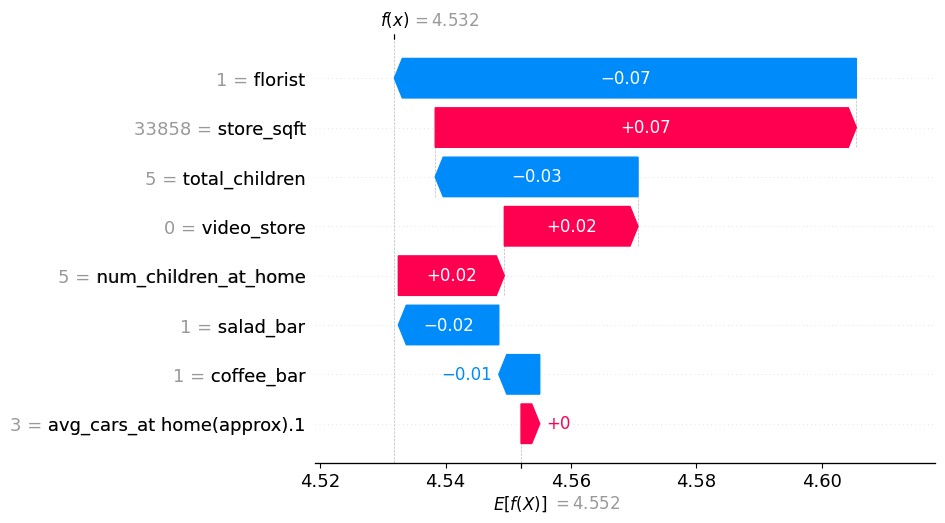

In [40]:
explainer = shap.Explainer(model)
shap_values = explainer(X_valid)
shap.plots.waterfall(shap_values[0])

In [41]:
shap.plots.initjs()

In [42]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [43]:
# visualize all the valid set predictions
shap.plots.force(shap_values[:500])

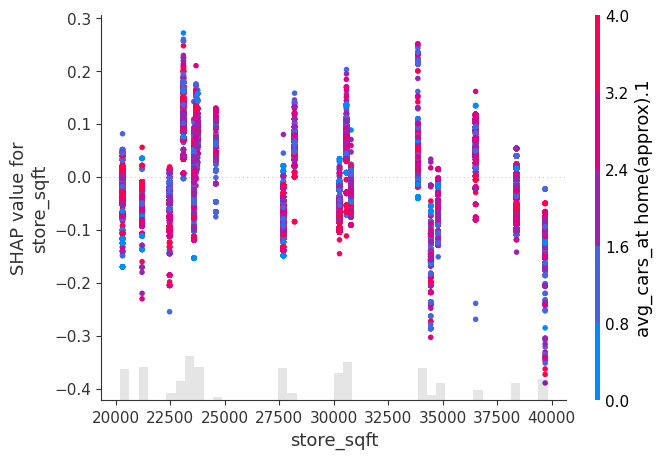

In [44]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "store_sqft"], color=shap_values)

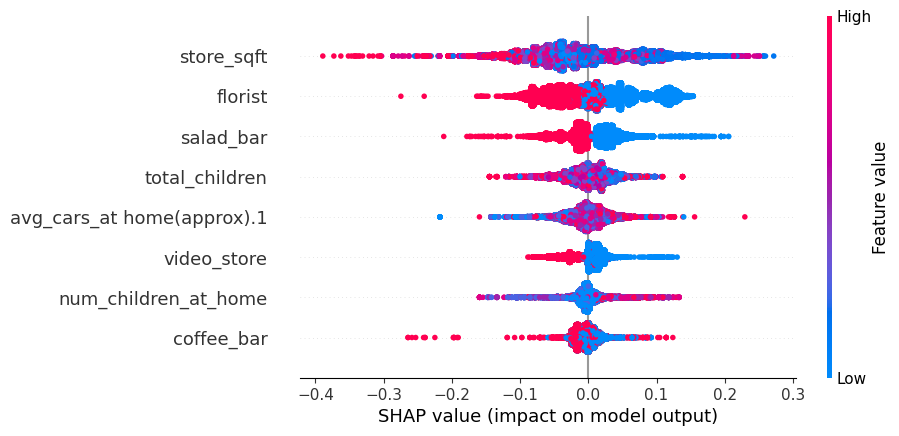

In [45]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

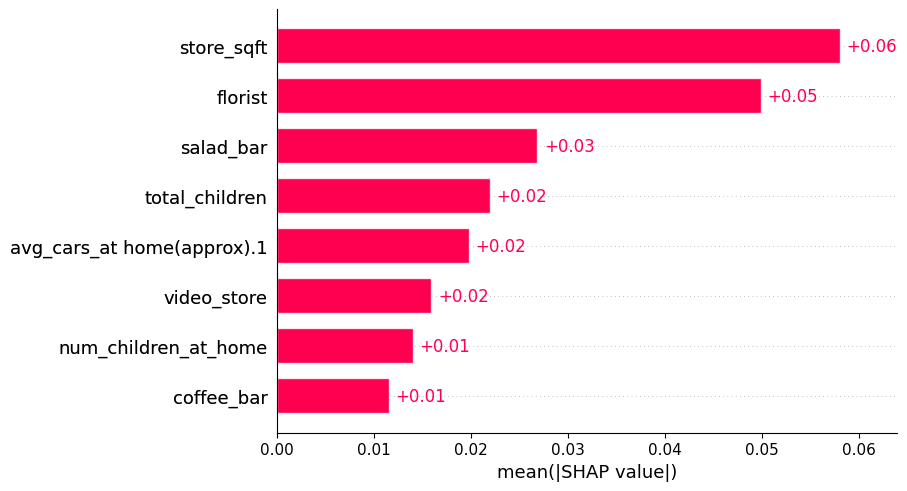

In [46]:
shap.plots.bar(shap_values)

### CatBoost

In [34]:
cat_params = {
    'iterations': 10000,
    'learning_rate': 0.07,
    'depth': 11,
    'l2_leaf_reg':8 ,
    'random_strength':0.5,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'task_type': 'GPU',
    'border_count': 128,
    'verbose': 1000,
    'early_stopping_rounds': 100,
    # 'use_best_model': True ,
    'random_state': 42,

}

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_cb = []
MODELS_CB = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]

    cb = CatBoostRegressor(**cat_params)
    cb.fit(X_train, y_train)
    MODELS_CB.append(cb)

    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(cb.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores_cb.append(fold_score)

print()
print(f'Average Vaildation RMSLE Score:', sum(scores_cb)/5)

#########################
### Fold 1
#########################
0:	learn: 0.3186456	total: 19.4ms	remaining: 3m 14s
1000:	learn: 0.2947492	total: 19.6s	remaining: 2m 56s
2000:	learn: 0.2946567	total: 39.7s	remaining: 2m 38s
3000:	learn: 0.2946249	total: 58.6s	remaining: 2m 16s
4000:	learn: 0.2946085	total: 1m 16s	remaining: 1m 54s
5000:	learn: 0.2945989	total: 1m 35s	remaining: 1m 35s
6000:	learn: 0.2945920	total: 1m 54s	remaining: 1m 16s
7000:	learn: 0.2945869	total: 2m 13s	remaining: 57s
8000:	learn: 0.2945828	total: 2m 31s	remaining: 37.8s
9000:	learn: 0.2945794	total: 2m 49s	remaining: 18.8s
9999:	learn: 0.2945770	total: 3m 10s	remaining: 0us


J:\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Fold RMSLE Score: 0.29342701537580496
#########################
### Fold 2
#########################
0:	learn: 0.3190061	total: 19.4ms	remaining: 3m 14s


KeyboardInterrupt: 

## Optuna

In [ ]:
import optuna
from functools import partial
import gc

class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the RMSLE score for the weighted prediction
        score = np.sqrt(mean_squared_log_error(y_true, weighted_pred))
        return score

    def fit(self, y_true, y_preds, n_trials=300):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=300):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [ ]:
# Initialize an array for storing test predictions
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
# trained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))
# models = {'xgb_reg': MODELS, 'gbr_reg': MODELS_GBR, 'lr_reg': MODELS_LR, 'dt_reg': MODELS_DTR, 'rf_reg': MODELS_RF}
models = {'xgb_reg': MODELS, 'gbr_reg': MODELS_GBR, 'rf_reg': MODELS_RF, 'cb_reg': MODELS_CB}

# Evaluate on validation data and store predictions on test data
# for i, (train_index, valid_index) in enumerate(kf.split(X, y)):

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)

    X_train_ = X.iloc[train_index]
    y_train_ = y.iloc[train_index]

    X_val = X.iloc[valid_index]
    y_val = y.iloc[valid_index]
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        
        y_val_pred = model[i].predict(X_val)
        
        test_pred = model[i].predict(X_test)
        
        # Convert predicted values back to their original scale by applying the expm1 function
        y_val_pred = np.exp(y_val_pred)
        test_pred = np.exp(test_pred)
        
        score = np.sqrt(mean_squared_log_error(np.exp(y_val), y_val_pred))
        print(f'RMSLE score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        # trained_models[f'{name}'].append(deepcopy(model))
    
    # Use Optuna to find the best ensemble weights
    y_val = np.exp(y_val)
    optweights = OptunaWeights(random_state=42)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    score = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    print(f'Optuna RMSLE score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    test_predss += optweights.predict(test_preds) / 5
    
    gc.collect()

In [ ]:
print(f'Average Vaildation RMSLE Score:', sum(ensemble_score)/5)
print(test_predss, len(test_predss))

## Submission

### Individual (without fold)

In [ ]:
# predictions = gbr.predict(test)
# submission_df = pd.DataFrame({'id': test['id'], 'cost': np.exp(predictions)})
# submission_df.to_csv('submission.csv', index=False)

### Optuna

In [ ]:
test = pd.read_csv('test.csv')
submission_optuna = pd.DataFrame(index = test.index.unique())
submission_optuna['id'] = test.id.unique()
submission_optuna['cost'] = test_predss

In [ ]:
submission_optuna.to_csv('submission_optuna.csv', index=False)

### Individual (with fold)

In [ ]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame(index = test.index.unique())
submission['id'] = test.id.unique()

test = test[FEATURES]
print("Features", FEATURES)

for i in range(5):
    print("Fold 1")
    submission[f'cost{i}'] = MODELS[i].predict(test)
submission['cost'] = np.exp((submission.cost0 + submission.cost1 + submission.cost2 + submission.cost3 + submission.cost4) / 5)
submission = submission[['id','cost']]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

# SHAP score